### Death Rates

In [4]:
#data manipulation
import pandas as pd
#data visualisation
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/kaggle/input/death-rates/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")

In [6]:
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


<h3>drop rows of NaN</h3>

In [7]:
# Assuming df is your DataFrame
# Check for NaN values in the entire DataFrame
nan_values = df.isna()  # or df.isnull()
# Count the number of NaN values in each column
nan_count_per_column = df.isna().sum()
nan_count_per_column


INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64

In [8]:
# Count the total number of NaN values in the entire DataFrame
total_nan_count = df.isna().sum().sum()
total_nan_count



6390

In [9]:
# Replace NaN values with a specific value, e.g., 0
df_filled = df.fillna(0)
df=df_filled

In [10]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       INDICATOR   UNIT  UNIT_NUM  STUB_NAME  STUB_NAME_NUM  STUB_LABEL  \
0         False  False     False      False          False       False   
1         False  False     False      False          False       False   
2         False  False     False      False          False       False   
3         False  False     False      False          False       False   
4         False  False     False      False          False       False   
...         ...    ...       ...        ...            ...         ...   
6385      False  False     False      False          False       False   
6386      False  False     False      False          False       False   
6387      False  False     False      False          False       False   
6388      False  False     False      False          False       False   
6389      False  False     False      False          False       False   

      STUB_LABEL_NUM   YEAR  YEAR_NUM    AGE  AGE

In [11]:
#getting descriptive statistics summary
df.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,11.765978
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.704676
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,3.200000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,8.700000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,17.400000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


In [12]:
# a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        6390 non-null   float64
 12  FLAG            6390 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


In [13]:
#getting estimate and age
df_ay = df[df['AGE'] != 'all ages'].groupby(['AGE', 'ESTIMATE']).size().reset_index(name='count')
df_ay.head(100)


,AGE,ESTIMATE,count
0,10-14 years,0.0,2
1,10-14 years,0.3,3
2,10-14 years,0.4,1
3,10-14 years,0.5,6
4,10-14 years,0.6,7
...,...,...,...
95,15-19 years,13.9,1
96,15-19 years,14.0,1
97,15-19 years,14.2,2
98,15-19 years,14.3,1


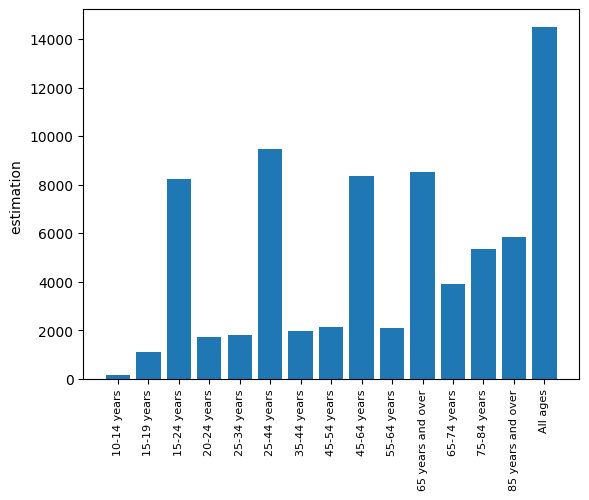

In [14]:

ages = [AGE for AGE, df in df.groupby('AGE')]
df_ay = df.groupby('AGE')['ESTIMATE'].sum()

plt.bar(ages, df_ay)
plt.xticks(ages, rotation='vertical', size=8)
plt.ylabel('estimation ')
plt.show()



In [15]:


def replace_all_persons_and_get_gender(x):
    return "Male" if x == "All persons" else x.split(":")[0]
    

df["STUB_LABEL"] = df["STUB_LABEL"].apply(replace_all_persons_and_get_gender)

In [16]:
df

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1950,1,All ages,0.0,13.2,0
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1960,2,All ages,0.0,12.5,0
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1970,3,All ages,0.0,13.1,0
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1980,4,All ages,0.0,12.2,0
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1981,5,All ages,0.0,12.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female,7.225,2018,42,65 years and over,5.0,1.3,0
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female,7.232,2018,42,15-24 years,2.0,4.1,0
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female,7.233,2018,42,25-44 years,3.0,4.4,0
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female,7.234,2018,42,45-64 years,4.0,3.2,0


In [17]:
df['STUB_NAME'] = df['STUB_NAME'].apply(lambda x: x.split(',')[0])
df


,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1950,1,All ages,0.0,13.2,0
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1960,2,All ages,0.0,12.5,0
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1970,3,All ages,0.0,13.1,0
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1980,4,All ages,0.0,12.2,0
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,Male,0.000,1981,5,All ages,0.0,12.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.225,2018,42,65 years and over,5.0,1.3,0
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.232,2018,42,15-24 years,2.0,4.1,0
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.233,2018,42,25-44 years,3.0,4.4,0
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.234,2018,42,45-64 years,4.0,3.2,0


In [18]:
def replace_Total(x):
    return "Sex" if x == "Total" else x
df["STUB_NAME"] = df["STUB_NAME"].apply(replace_Total)
df

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,0,Male,0.000,1950,1,All ages,0.0,13.2,0
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,0,Male,0.000,1960,2,All ages,0.0,12.5,0
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,0,Male,0.000,1970,3,All ages,0.0,13.1,0
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,0,Male,0.000,1980,4,All ages,0.0,12.2,0
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex,0,Male,0.000,1981,5,All ages,0.0,12.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.225,2018,42,65 years and over,5.0,1.3,0
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.232,2018,42,15-24 years,2.0,4.1,0
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.233,2018,42,25-44 years,3.0,4.4,0
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Sex,11,Female,7.234,2018,42,45-64 years,4.0,3.2,0
